In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import re

In [2]:
def sign(x):
    x=x.replace('\n','')
    s=(',','.','?',';','!','-','  ')
    for i in s:
        x=x.replace(i,i+' ')
    return x.replace('  ',' ')

def len_ret(x:str):
    a=sign(x)
    a_split=a.split(' ')
    r=''
    num=20
    for i in a_split:
        if len(r+i)>num:
            r+='\n'
            num+=20
        r+=i+' '

    return r

In [10]:
c=pd.read_excel(r'C:\Users\Rom\Downloads\Telegram Desktop\11А (1).xlsx',engine = "openpyxl")
c=c.rename(columns={'Unnamed: 1':'Дейсвие', 'Unnamed: 2':'Время','Unnamed: 3':'Способ','Unnamed: 4':'предмет',
                 'Unnamed: 5':'тема урока','Unnamed: 5':'Ресурс','Unnamed: 6':'Ресурс','Unnamed: 7':'Домашнее задание'})
c=c.fillna(' ')

[0]


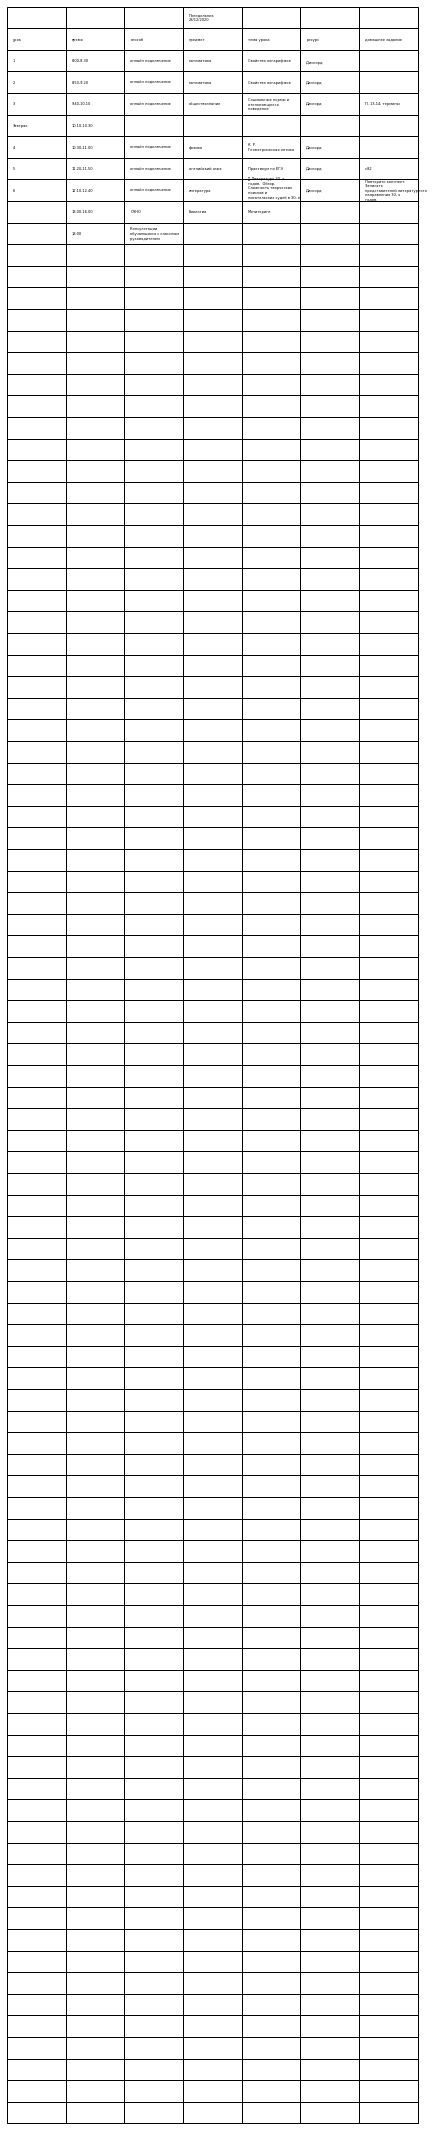

In [11]:
d=np.array(c)[:,1:8]

num=[]
day_n=('Понедельник','Вторник','Среда','Четверг','Пятница','Суббота')
for ch_i,i in enumerate(d):
    for ch_j,j in enumerate(i):            
        if isinstance(j,datetime.datetime):
            num.append(ch_i)
            d[ch_i,ch_j]='{name_day}\n{day}/{month}/{year}'.format(day=j.day,#опредляем время
                                                                   month=j.month,
                                                                   year=j.year,
                                                                   name_day=day_n[j.weekday()])
            break
            
        elif len(str(j))>20:
            d[ch_i,ch_j]=len_ret(j)#укорачиваем строки
            
num_e=[]
print(num)
while len(num)!=0:
    num_e.append(num[:2])
    num.pop(0)
else:
    num_e[-1].append(-1)

for ch,i in enumerate(num_e):
    v = d[i[0]:i[1]-1]
    fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')

    fig.tight_layout()

    t=plt.table(v,loc=4 ,cellLoc='left', rowLoc='right')
    t.auto_set_font_size(False)
    t.scale(1, 1.8)#1.25,2.5
    t.set_fontsize(3.6)#5
    
#     plt.savefig(r'C:\Users\Rom\Downloads\table_'+str(ch)+'.png',dpi=900)